<a href="https://colab.research.google.com/github/Lukerabr/Colab/blob/main/Atividade_IA_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree


#products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/olist_products_dataset.csv')

#dataset separado
#customers = customer id, customer unique id, customer zip code, customer city, customer state
#items = order id, order item id, product id, seller id, shipping limit date, price, freight value
#reviews = review id, order id, review score, review comment title, review comment message, review creation date, review answer time
#orders = order id, customer id, order status, order purchase time, order approved at, order delivered can, order delivered customer date, order estimated date
#products = product id, product category, product name lenght, product descrip length, product qtd photos, product weight, product length cm, product height cm, product width cm
#sellers = seller id, seller zip code, seller city, seller state


#dataset filtrado

# conexões que serão feitas entre as tabelas, no caso, os atributos que serão usados para o merge, e gerar uma tabela com as informações principais

#customer = customer id, customer zip code
#items = order id, product id, seller id, price freight value
#reviews = order id, review score
#order = order id, customer id, tempo de entrega = (order delivered customer - order aproved at)
#sellers = seller id, seller zip code, state e city


#dataset unido
# dataset com as colunas, ID do cliente, código postal do cliente, ID do pedido, tempo de entrega, id do produto, id do vendedor, preço do frete,
# código postal do vendedor e o review score

#customer id, customer zip code, order id, tempo de entrega, product id, seller id, price freight value, seller zip code, review score

In [ ]:
# 1º CUSTOMER(customer id, customer zip code) UNIAO ORDER(order id, customer id, tempo de entrega)
#leitura das tabelas customer e order
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/olist_customers_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/olist_orders_dataset.csv')

#calcular o tempo de entrega, subtraindo a data de aprovação do pagamento com a data de entrega do produto
#alterar o tipo de dado das colunas para DATE para realizar a subtração e retornar os dias
orders['tempo_de_entrega'] = pd.to_datetime(orders['order_delivered_customer_date']) -  pd.to_datetime(orders['order_approved_at'])

#remover atributos desnecessários
customers.drop(['customer_unique_id',],1, inplace = True)
orders.drop(['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'],1, inplace = True)

#união da tabela customer com orders
tabela_customer_orders = pd.merge(customers, orders)

#visualização da tabela
tabela_customer_orders

In [ ]:
# 2º tabela_customer_order UNIR com review e item (3 uniões)

#leitura das tabelas review e item
review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/olist_order_reviews_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/olist_order_items_dataset.csv')

#remover atributos desnecessários
review.drop(['review_id', 'review_creation_date', 'review_answer_timestamp'],1, inplace = True)
items.drop(['order_item_id', 'shipping_limit_date', 'price'],1, inplace = True)

#remover nulos
review_no_null = review.dropna(subset=['review_comment_title','review_comment_message'])

#união da tabela customer order com review
tabela_customer_orders_review = pd.merge(tabela_customer_orders, review_no_null)
#união da tabela customer order review com items
tabela_customer_orders_review_items = pd.merge(tabela_customer_orders_review, items)

#visualização da tabela
tabela_customer_orders_review_items

In [ ]:
# 3 tabela_customer_orders_review_items UNIR com sellers

#leitura da tabela
sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/olist_sellers_dataset.csv')

#união das tabelas
tabela_customer_orders_review_items_sellers = pd.merge(tabela_customer_orders_review_items, sellers)

#visualização da tabela
tabela_customer_orders_review_items_sellers



In [ ]:
tabela_customer_orders_review_items_sellers

In [ ]:
#contagem de nulos nas colunas
tabela_customer_orders_review_items_sellers.isnull().sum(axis = 0)

In [ ]:
#contagem de nulos nas linhas
tabela_customer_orders_review_items_sellers.isnull().sum(axis = 1)

In [ ]:
#Caso review score seja maior que 3 o review recebe 1, caso contrário recebe 0, 
#com isso, review bom e ruim, respectivamente

labels = []

for score in tabela_customer_orders_review_items_sellers['review_score']:
  if score > 3:
    labels.append(1)
  else:
    labels.append(0)

#atualização da coluna review_score, recebendo os valores "0" e "1"
tabela_customer_orders_review_items_sellers['review_score'] = labels

In [ ]:
#variavel recebendo o encoder
label_customer_city = LabelEncoder()
label_customer_state = LabelEncoder()
label_review_comment_title = LabelEncoder()
label_review_comment_message = LabelEncoder()
label_seller_city = LabelEncoder()
label_seller_state = LabelEncoder()
label_freight_value = LabelEncoder();
label_customer_id = LabelEncoder();
label_order_id = LabelEncoder();
label_tempo_de_entrega = LabelEncoder();
label_product_id = LabelEncoder();
label_seller_id = LabelEncoder()

In [ ]:
#transformar todas as colunas que são objetos ou outros tipos de dados em numeros inteiros
tabela_customer_orders_review_items_sellers['customer_city'] = label_customer_city.fit_transform(tabela_customer_orders_review_items_sellers['customer_city'])
tabela_customer_orders_review_items_sellers['customer_state'] = label_customer_state.fit_transform(tabela_customer_orders_review_items_sellers['customer_state'])
tabela_customer_orders_review_items_sellers['review_comment_title'] = label_review_comment_title.fit_transform(tabela_customer_orders_review_items_sellers['review_comment_title'])
tabela_customer_orders_review_items_sellers['review_comment_message'] = label_review_comment_message.fit_transform(tabela_customer_orders_review_items_sellers['review_comment_message'])
tabela_customer_orders_review_items_sellers['seller_city'] = label_seller_city.fit_transform(tabela_customer_orders_review_items_sellers['seller_city'])
tabela_customer_orders_review_items_sellers['seller_state'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['seller_state'])
tabela_customer_orders_review_items_sellers['freight_value'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['freight_value'])
tabela_customer_orders_review_items_sellers['order_id'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['order_id'])
tabela_customer_orders_review_items_sellers['tempo_de_entrega'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['tempo_de_entrega'])
tabela_customer_orders_review_items_sellers['product_id'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['product_id'])
tabela_customer_orders_review_items_sellers['seller_id'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['seller_id'])
tabela_customer_orders_review_items_sellers['customer_id'] = label_seller_state.fit_transform(tabela_customer_orders_review_items_sellers['customer_id'])

In [ ]:
tabela_customer_orders_review_items_sellers.info()

In [ ]:
#deixar o nome do dataset menor
dataset_final = tabela_customer_orders_review_items_sellers

In [ ]:
#salvar csv
dataset_final.to_csv(r'/content/drive/MyDrive/Colab Notebooks/DatasetReviewScore/dataset_final.csv', columns=['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'tempo_de_entrega', 'review_score', 'review_comment_title', 'review_comment_message', 'product_id', 'seller_id', 'freight_value', 'seller_zip_code_prefix', 'seller_city', 'seller_state'])

In [ ]:
#Alocando em uma variável o alvo que nós queremos saber, para separar como treino e teste
alvo = dataset_final['review_score']

In [ ]:
#remover review_score do dataset
dataset_final_sem_alvo = dataset_final.drop('review_score', axis = 'columns')
dataset_final_sem_alvo

In [ ]:
#separar entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(dataset_final_sem_alvo, alvo, test_size=0.2)

In [ ]:
#definindo o ccp_alpha para poda da arvore depois de análises prévias de gráfico
ideal_ccp_alpha = 0.0075
float(ideal_ccp_alpha)

ideal_ccp_alpha

0.0075

In [ ]:
#definindo o classificador com o ccp_alpha
classificador_podado = DecisionTreeClassifier(criterion='entropy',random_state = 42, ccp_alpha = ideal_ccp_alpha)
classificador_podado = classificador_podado.fit(X_train, Y_train)

[Text(640.0588235294117, 520.95, 'tempo_de_entrega <= 9268.0\nentropy = 0.921\nsamples = 9376\nvalue = [3150, 6226]\nclass = Review ruim'),
 Text(574.4117647058823, 475.65000000000003, 'review_comment_title <= 3943.5\nentropy = 0.888\nsamples = 8857\nvalue = [2703, 6154]\nclass = Review ruim'),
 Text(508.76470588235287, 430.35, 'review_comment_message <= 8862.5\nentropy = 0.922\nsamples = 7883\nvalue = [2661, 5222]\nclass = Review ruim'),
 Text(443.1176470588235, 385.05, 'review_comment_title <= 1669.5\nentropy = 0.931\nsamples = 7663\nvalue = [2656, 5007]\nclass = Review ruim'),
 Text(262.5882352941176, 339.75, 'review_comment_title <= 1566.5\nentropy = 0.853\nsamples = 3138\nvalue = [873, 2265]\nclass = Review ruim'),
 Text(196.94117647058823, 294.45, 'review_comment_title <= 1106.5\nentropy = 0.898\nsamples = 2735\nvalue = [859, 1876]\nclass = Review ruim'),
 Text(131.2941176470588, 249.14999999999998, 'review_comment_title <= 1029.5\nentropy = 0.848\nsamples = 2168\nvalue = [595, 1

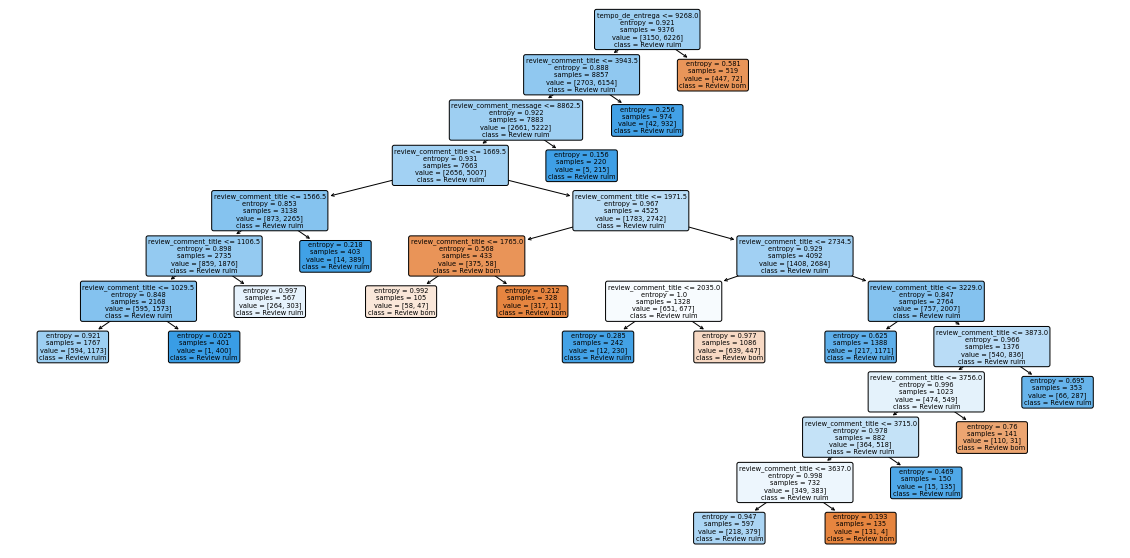

In [ ]:
#impressão da árvore
plt.figure(figsize=(20, 10))

tree.plot_tree(classificador_podado, filled=True, rounded= True, class_names=["Review bom", "Review ruim"], feature_names=dataset_final_sem_alvo.columns)

In [ ]:
#verificar o score
classificador_podado.score(X_test, Y_test)

# Recomenda-se a empresa melhorar o tempo de entrega para os produtos, de acordo com a análise o fator que tem maior peso no review positivo ou negativo de uma venda é o tempo de entrega, que consiste na diferença entre a data de entrega com a data de confirmação de pagamento.